In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

###  Convolutional Networks

Another approach to creating models that are invariant to certain transformations of the inputs is to build the invariance properties into the structure of a neural network. This is the basis for the convolutional neural network (Le Cun et al., 1989; LeCun et al., 1998), which has been widely applied to image data.

Consider the specific task of recognizing handwritten digits. Each input image comprises a set of pixel intensity values, and the desired output is a posterior probability distribution over the ten digit classes. We know that the identity of the digit is invariant under translations and scaling as well as (small) rotations. 
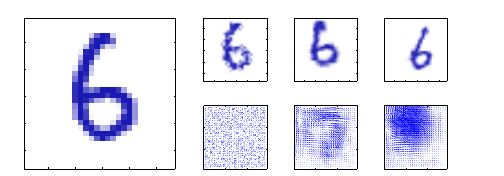

Furthermore, the network must also exhibit invariance to more subtle transformations such as elastic deformations of the kind illustrated in Fig.14.

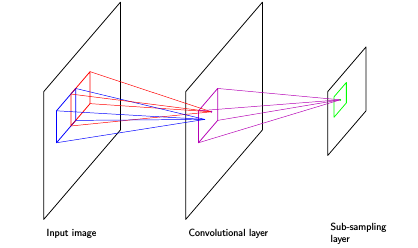

Fig.17 Diagram illustrating part of a convolutional neural network, showing a layer of convolutional units followed by a layer of subsampling units. Several successive pairs of such layers may be used.

One simple approach would be to treat the image as the input to a fully connected network, such as the kind shown in Fig.1. 

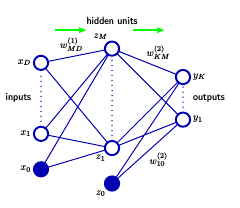

Given a sufficiently large training set, such a network could in principle yield a good solution to this problem and would learn the appropriate invariances by example. However, this approach ignores a key property of images, which is that nearby pixels are more strongly correlated than more distant pixels.

Many of the modern approaches to computer vision exploit this property by extracting local features that depend only on small subregions of the image. Information from such features can then be merged in later stages of processing in order to detect higher-order features and ultimately to yield information about the image as a whole. Also, local features that are useful in one region of the image are likely to be useful in other regions of the image, for instance if the object of interest is translated.

These notions are incorporated into convolutional neural networks through three mechanisms: 
1. Local receptive fields,
2. Weight sharing,
3. Subsampling.

The structure of a convolutional network is illustrated in **Fig.17**. In the convolutional layer, the units are organized into planes, each of which is called a **feature map**. Units in a feature map each take inputs only from a small subregion of the image, and all of the units in a feature map are constrained to share the same weight values. 

For instance, a feature map might consist of 100 units arranged in a $ 10 \times 10 $ grid, with each unit taking inputs from a $ 5 \times 5 $ pixel patch of the image. The whole feature map therefore has 25 adjustable weight parameters plus one adjustable bias parameter. Input values from a patch are linearly combined using the weights and the bias, and the result is transformed by a sigmoidal nonlinearity using the equation:

$$
y(x) = \sigma(w^T x + b)
$$

Where $ \sigma $ is the sigmoid activation function, $ w $ represents the weights, $ x $ is the input, and $ b $ is the bias.

If we think of the units as feature detectors, then all of the units in a feature map detect the same pattern but at different locations in the input image. Due to the weight sharing, the evaluation of the activations of these units is equivalent to a convolution of the image pixel intensities with a **kernel** comprising the weight parameters. If the input image is shifted, the activations of the feature map will be shifted by the same amount but will otherwise be unchanged. This provides the basis for the (approximate) invariance of the network outputs to translations and distortions of the input image.

Because we will typically need to detect multiple features in order to build an effective model, there will generally be multiple feature maps in the convolutional layer, each having its own set of weight and bias parameters.

The outputs of the convolutional units form the inputs to the **subsampling layer** of the network. For each feature map in the convolutional layer, there is a plane of units in the subsampling layer, and each unit takes inputs from a small receptive field in the corresponding feature map of the convolutional layer. These units perform subsampling. For instance, each subsampling unit might take inputs from a $ 2 \times 2 $ unit region in the corresponding feature map and would compute the average of those inputs, multiplied by an adaptive weight with the addition of an adaptive bias parameter, and then transformed using a sigmoidal nonlinear activation function.

The receptive fields are chosen to be contiguous and non-overlapping so that there are half the number of rows and columns in the subsampling layer compared with the convolutional layer. In this way, the response of a unit in the subsampling layer will be relatively insensitive to small shifts of the image in the corresponding regions of the input space.

In a practical architecture, there may be several pairs of convolutional and subsampling layers. At each stage, there is a larger degree of invariance to input transformations compared to the previous layer. There may be several feature maps in a given convolutional layer for each plane of units in the previous subsampling layer, so that the gradual reduction in spatial resolution is then compensated by an increasing number of features.

The final layer of the network would typically be a fully connected, fully adaptive layer, with a **softmax** output nonlinearity in the case of multiclass classification.

The whole network can be trained by error minimization using **backpropagation** to evaluate the gradient of the error function. This involves a slight modification of the usual backpropagation algorithm to ensure that the shared-weight constraints are satisfied. Due to the use of local receptive fields, the number of weights in the network is smaller than if the network were fully connected. Furthermore, the number of independent parameters to be learned from the data is much smaller still, due to the substantial numbers of constraints on the weights.



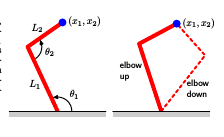

Fig.18 The left ﬁgure shows a two-link robot arm, in which the Cartesian coordinates (x1 , x2 ) of the end ef- fector are determined uniquely by the two joint angles θ1 and θ2 and the (ﬁxed) lengths L1 and L2 of the arms. This is know as the forward kinematics of the arm. In prac- tice, we have to ﬁnd the joint angles that will give rise to a desired end effector position and, as shown in the right ﬁg- ure, this inverse kinematics has two solutions correspond- ing to ‘elbow up’ and ‘elbow down’.

###  Soft Weight Sharing

One way to reduce the effective complexity of a network with a large number of weights is to constrain weights within certain groups to be equal. This is the technique of weight sharing that was discussed in Section 5.5.6 as a way of building translation invariance into networks used for image interpretation. It is only applicable, however, to particular problems in which the form of the constraints can be specified in advance. Here we consider a form of **soft weight sharing** (Nowlan and Hinton, 1992) in which the hard constraint of equal weights is replaced by a form of regularization in which groups of weights are encouraged to have similar values. Furthermore, the division of weights into groups, the mean weight value for each group, and the spread of values within the groups are all determined as part of the learning process.

Recall that the simple weight decay regularizer, given in (5.112), can be viewed as the negative log of a Gaussian prior distribution over the weights. We can encourage the weight values to form several groups, rather than just one group, by considering instead a probability distribution that is a mixture of Gaussians. The centres and variances of the Gaussian components, as well as the mixing coefficients, will be considered as adjustable parameters to be determined as part of the learning process.

Thus, we have a probability density of the form:

$$
p(w) = \prod_{i} p(w_i)
$$

where 

$$
p(w_i) = \sum_{j=1}^M \pi_j \mathcal{N}(w_i | \mu_j, \sigma_j^2)
$$

and $ \pi_j $ are the mixing coefficients. Taking the negative logarithm then leads to a regularization function of the form:

$$
\Omega(w) = -\sum_{i} \ln \left( \sum_{j=1}^M \pi_j \mathcal{N}(w_i | \mu_j, \sigma_j^2) \right)
$$

The total error function is then given by:

$$
E(w) = E(w) + \lambda \Omega(w)
$$

where $ \lambda $ is the regularization coefficient. This error is minimized both with respect to the weights $ w_i $ and with respect to the parameters $ \{\pi_j, \mu_j, \sigma_j\} $ of the mixture model.

If the weights were constant, then the parameters of the mixture model could be determined by using the **EM algorithm** discussed in Chapter 9. However, the distribution of weights is itself evolving during the learning process, and so to avoid numerical instability, a joint optimization is performed simultaneously over the weights and the mixture-model parameters. This can be done using a standard optimization algorithm such as conjugate gradients or quasi-Newton methods.

In order to minimize the total error function, it is necessary to be able to evaluate its derivatives with respect to the various adjustable parameters. To do this, it is convenient to regard the $ \{\pi_j\} $ as prior probabilities and to introduce the corresponding posterior probabilities which, following Bayes' theorem, are given by:

$$
\gamma_j(w) = \frac{\pi_j \mathcal{N}(w | \mu_j, \sigma_j^2)}{\sum_{k=1}^M \pi_k \mathcal{N}(w | \mu_k, \sigma_k^2)}
$$

The derivatives of the total error function with respect to the weights are then given by:

$$
\frac{\partial E}{\partial w_i} = \frac{\partial E}{\partial w_i} + \lambda \sum_{j} \gamma_j(w_i) \left( \frac{w_i - \mu_j}{\sigma_j^2} \right)
$$

The effect of the regularization term is therefore to pull each weight towards the center of the $ j $-th Gaussian, with a force proportional to the posterior probability of that Gaussian for the given weight. This is precisely the kind of effect that we are seeking.

Derivatives of the error with respect to the centres of the Gaussians are also easily computed to give:

$$
\frac{\partial E}{\partial \mu_j} = \lambda \sum_{i} \gamma_j(w_i) \left( \frac{\mu_j - w_i}{\sigma_j^2} \right)
$$

This has a simple intuitive interpretation, because it pushes $ \mu_j $ towards an average of the weight values, weighted by the posterior probabilities that the respective weight parameters were generated by component $ j $.

Similarly, the derivatives with respect to the variances are given by:

$$
\frac{\partial E}{\partial \sigma_j} = \lambda \sum_{i} \gamma_j(w_i) \left( \frac{(w_i - \mu_j)^2}{\sigma_j^3} - \frac{1}{\sigma_j} \right)
$$

This drives $ \sigma_j $ towards the weighted average of the squared deviations of the weights around the corresponding center $ \mu_j $, where the weighting coefficients are again given by the posterior probability that each weight is generated by component $ j $.

Note that in a practical implementation, new variables $ \eta_j $ defined by:

$$
\sigma_j^2 = \exp(\eta_j)
$$

are introduced, and the minimization is performed with respect to the $ \eta_j $. This ensures that the parameters $ \sigma_j $ remain positive. It also has the effect of discouraging pathological solutions in which one or more of the $ \sigma_j $ goes to zero, corresponding to a Gaussian component collapsing onto one of the weight parameter values.

For the derivatives with respect to the mixing coefficients $ \pi_j $, we need to take account of the constraints:

$$
\sum_{j} \pi_j = 1, \quad 0 \leq \pi_j \leq 1
$$

This can be done by expressing the mixing coefficients in terms of a set of auxiliary variables \( \eta_j \) using the **softmax** function:

$$
\pi_j = \frac{\exp(\eta_j)}{\sum_{k=1}^M \exp(\eta_k)}
$$

The derivatives of the regularized error function with respect to the $ \eta_j $ then take the form:

$$
\frac{\partial E}{\partial \eta_j} = \lambda \sum_{i} \left( \pi_j - \gamma_j(w_i) \right)
$$

We see that $ \pi_j $ is therefore driven towards the average posterior probability for component $ j $.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader  # Correct import

# Define the Soft Weight Sharing Regularization Class
class SoftWeightSharing(nn.Module):
    def __init__(self, num_gaussians, weight_dim):
        super(SoftWeightSharing, self).__init__()
        self.num_gaussians = num_gaussians
        self.weight_dim = weight_dim

        # Parameters for the Gaussian Mixture Model
        self.mu = nn.Parameter(torch.randn(num_gaussians, weight_dim))  # Mean of Gaussians
        self.sigma = nn.Parameter(torch.randn(num_gaussians, weight_dim))  # Standard deviation of Gaussians
        self.pi = nn.Parameter(torch.ones(num_gaussians) / num_gaussians)  # Mixing coefficients

    def forward(self, weights):
        # Compute the Gaussian mixture likelihoods for the given weights
        gamma = self.compute_gamma(weights)
        
        # Regularization term
        regularization = self.compute_regularization(gamma, weights)
        return regularization

    def compute_gamma(self, weights):
        # Compute the posterior probability for each Gaussian component
        num_weights = weights.size(0)
        gamma = torch.zeros(num_weights, self.num_gaussians)
        
        for j in range(self.num_gaussians):
            diff = weights - self.mu[j]
            exponent = torch.exp(-0.5 * (diff ** 2) / (self.sigma[j] ** 2))
            denominator = torch.sqrt(2 * torch.pi * (self.sigma[j] ** 2))
            gamma[:, j] = self.pi[j] * (exponent / denominator)

        # Normalize gamma
        gamma_sum = gamma.sum(dim=1, keepdim=True)
        gamma = gamma / gamma_sum
        return gamma

    def compute_regularization(self, gamma, weights):
        # Regularization term based on the posterior probabilities
        regularization = 0
        for j in range(self.num_gaussians):
            diff = weights - self.mu[j]
            regularization += torch.sum(gamma[:, j] * (diff ** 2) / (self.sigma[j] ** 2))
        return regularization

# Define a simple neural network model with Soft Weight Sharing
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_gaussians=3):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.soft_weight_sharing = SoftWeightSharing(num_gaussians, hidden_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def get_regularization(self):
        # Calculate the regularization term for the hidden layer weights
        regularization = 0
        for name, param in self.named_parameters():
            if 'fc1' in name:  # Only apply regularization to the hidden layer weights (fc1)
                regularization += self.soft_weight_sharing(param)
        return regularization

# Training function with regularization
def train(model, train_loader, num_epochs=10, learning_rate=0.001, lambda_reg=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Add regularization
            regularization_loss = model.get_regularization()
            total_loss = loss + lambda_reg * regularization_loss

            # Backward pass and optimization
            total_loss.backward()
            optimizer.step()

            running_loss += total_loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Example Usage
if __name__ == "__main__":
    # Example data, assume input dimension of 10, hidden layer of size 5, output of 3 classes
    input_dim = 10
    hidden_dim = 5
    output_dim = 3
    num_gaussians = 3

    # Dummy data loader (replace with real dataset)
    train_data = torch.randn(100, input_dim)
    train_targets = torch.randint(0, output_dim, (100,))
    train_loader = DataLoader(list(zip(train_data, train_targets)), batch_size=32)

    # Initialize and train the model
    model = SimpleModel(input_dim, hidden_dim, output_dim, num_gaussians)
    train(model, train_loader)


In [ ]:
import numpy as np

# Soft Weight Sharing Regularization Class
class SoftWeightSharing:
    def __init__(self, num_gaussians, weight_dim):
        self.num_gaussians = num_gaussians
        self.weight_dim = weight_dim

        # Parameters for the Gaussian Mixture Model
        self.mu = np.random.randn(num_gaussians, weight_dim)  # Mean of Gaussians
        self.sigma = np.random.randn(num_gaussians, weight_dim)  # Standard deviation of Gaussians
        self.pi = np.ones(num_gaussians) / num_gaussians  # Mixing coefficients

    def compute_gamma(self, weights):
        num_weights = weights.shape[0]
        gamma = np.zeros((num_weights, self.num_gaussians))

        for j in range(self.num_gaussians):
            diff = weights - self.mu[j]
            exponent = np.exp(-0.5 * (diff ** 2) / (self.sigma[j] ** 2))
            denominator = np.sqrt(2 * np.pi * (self.sigma[j] ** 2))
            gamma[:, j] = self.pi[j] * (exponent / denominator)

        # Normalize gamma
        gamma_sum = np.sum(gamma, axis=1, keepdims=True)
        gamma /= gamma_sum
        return gamma

    def compute_regularization(self, gamma, weights):
        regularization = 0
        for j in range(self.num_gaussians):
            diff = weights - self.mu[j]
            regularization += np.sum(gamma[:, j] * (diff ** 2) / (self.sigma[j] ** 2))
        return regularization

# Define a simple feedforward network without using torch
class SimpleModel:
    def __init__(self, input_dim, hidden_dim, output_dim, num_gaussians=3):
        # Manually define the weights and biases
        self.W1 = np.random.randn(input_dim, hidden_dim)  # Weights for input to hidden
        self.b1 = np.zeros(hidden_dim)  # Bias for hidden layer
        self.W2 = np.random.randn(hidden_dim, output_dim)  # Weights for hidden to output
        self.b2 = np.zeros(output_dim)  # Bias for output layer

        # Soft weight sharing
        self.soft_weight_sharing = SoftWeightSharing(num_gaussians, hidden_dim)

    def forward(self, x):
        # Input to hidden layer (manual computation)
        z1 = np.dot(x, self.W1) + self.b1  # Linear transformation
        a1 = np.maximum(0, z1)  # ReLU activation (max(0, z1))

        # Hidden to output layer (manual computation)
        z2 = np.dot(a1, self.W2) + self.b2  # Linear transformation
        return z2

    def get_regularization(self):
        # Calculate the regularization term for the hidden layer weights
        return self.soft_weight_sharing.compute_regularization(self.W1)

# Train the model
def train(model, train_data, train_targets, num_epochs=10, learning_rate=0.001, lambda_reg=0.01):
    for epoch in range(num_epochs):
        epoch_loss = 0
        for i in range(len(train_data)):
            x = train_data[i].reshape(1, -1)  # reshape for a single sample
            target = train_targets[i].reshape(1, -1)

            # Forward pass
            outputs = model.forward(x)
            loss = np.mean((outputs - target) ** 2)  # MSE loss

            # Add regularization
            regularization_loss = model.get_regularization()
            total_loss = loss + lambda_reg * regularization_loss

            # Backpropagation
            model.W2 -= learning_rate * np.dot(model.a1.T, (outputs - target))  # Update W2
            model.b2 -= learning_rate * np.sum(outputs - target, axis=0)  # Update b2

            d_a1 = np.dot(outputs - target, model.W2.T)
            d_z1 = d_a1 * (model.a1 > 0)  # derivative of ReLU activation

            model.W1 -= learning_rate * np.dot(x.T, d_z1)  # Update W1
            model.b1 -= learning_rate * np.sum(d_z1, axis=0)  # Update b1

            # Apply the soft weight sharing regularization update (gradient descent)
            # (for simplification, we'll assume it's a part of the total gradient)
            model.W1 -= learning_rate * lambda_reg * model.get_regularization()

            epoch_loss += total_loss

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_data):.4f}')

# Example usage
if __name__ == "__main__":
    # Example data, assume input dimension of 10, hidden layer of size 5, output of 3 classes
    input_dim = 10
    hidden_dim = 5
    output_dim = 3
    num_gaussians = 3

    # Generate random data (100 samples, input dimension = 10)
    train_data = np.random.randn(100, input_dim)
    train_targets = np.random.randint(0, output_dim, size=(100, 1))

    # Initialize and train the model
    model = SimpleModel(input_dim, hidden_dim, output_dim, num_gaussians)
    train(model, train_data, train_targets)


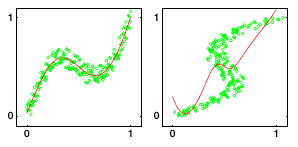

Fig.19 On the left is the data set for a simple ‘forward problem’ in which the red curve shows the result of ﬁtting a two-layer neural network by minimizing the sum-of-squares error function. The corresponding inverse problem, shown on the right, is obtained by exchanging the roles of x and t. Here the same network trained again by minimizing the sum-of-squares error function gives a very poor ﬁt to the data due to the multimodality of the data set.
## 5.6 Mixture Density Networks

The goal of supervised learning is to model a conditional distribution $ p(t|x) $, which for many simple regression problems is chosen to be Gaussian. However, practical machine learning problems often exhibit significantly non-Gaussian distributions. These can arise, for example, with inverse problems where the distribution can be multimodal. In such cases, assuming a Gaussian distribution can lead to very poor predictions.

### Example: Robot Kinematics
Consider the kinematics of a robot arm, as illustrated in **Fig.18**. 
- The **forward problem** involves finding the end-effector position given the joint angles, which has a unique solution.
- The **inverse problem** involves finding the joint angles needed to move the end effector to a specific position. This problem has multiple solutions, as shown in **Fig.18**.

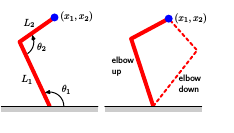

Forward problems often correspond to causality in physical systems and typically have unique solutions. For instance:
- A specific pattern of symptoms in the human body may result from a particular disease.

In contrast, in pattern recognition, we often deal with inverse problems. For example:
- Predicting the presence of a disease based on symptoms, where several diseases may share the same symptom pattern.

If the forward problem involves a many-to-one mapping, then the inverse problem will have multiple solutions. In the robot kinematics example, this is defined by geometrical equations, and the multimodality is apparent. However, multimodality in high-dimensional machine learning problems can be less obvious.

### A Toy Problem Example
For tutorial purposes, consider a simple toy problem:
1. Data is generated by sampling $ x $ uniformly over the interval $(0, 1)$, yielding a set of values $ \{x_n\} $.
2. Corresponding target values $ t_n $ are obtained using the function:
   $$
   t_n = x_n + 0.3 \sin(2\pi x_n) + \text{noise},
   $$
   where the noise is uniformly distributed over the interval $(-0.1, 0.1)$.

The **inverse problem** is created by swapping the roles of $ x $ and $ t $ in the dataset.

### Results
**Figure 5.19** shows:
- The data set for the forward problem (left) with the result of fitting a two-layer neural network by minimizing the sum-of-squares error function.
- The inverse problem (right) shows the same network trained on swapped roles of \( x \) and \( t \), which performs poorly due to multimodality in the data.

Least squares corresponds to maximum likelihood under a Gaussian assumption, which is inadequate for highly non-Gaussian inverse problems.

### Mixture Model Framework
To address this, we use a **mixture model** for $ p(t|x) $, where both the mixing coefficients and the component densities are flexible functions of the input vector $ x $. This gives rise to the **mixture density network (MDN)**. For any given $ x $, the mixture model provides a general formalism to model arbitrary conditional density functions $ p(t|x) $. 

#### Gaussian Mixture Model
Using Gaussian components, the mixture model is given by:
$$
p(t|x) = \sum_{k=1}^K \pi_k(x) \mathcal{N}(t | \mu_k(x), \sigma_k^2(x)),
$$
where:
- $ \pi_k(x) $: Mixing coefficients.
- $ \mu_k(x) $: Means of the Gaussian components.
- $ \sigma_k^2(x) $: Variances of the Gaussian components.

This is an example of a **heteroscedastic model**, where the noise variance depends on the input $ x $.

#### Extensions
- Instead of Gaussian distributions, other distributions (e.g., Bernoulli for binary targets) can be used.
- While the example assumes isotropic covariance for simplicity, the model can be extended to allow general covariance matrices, e.g., using Cholesky factorization (Williams, 1996).

Even with isotropic components, the conditional distribution $ p(t|x) $ does not factorize with respect to the components of $ t $. This is in contrast to the standard sum-of-squares regression model, due to the mixture distribution.

### Parameters
The various parameters of the mixture model—mixing coefficients $ \pi_k(x) $, means $ \mu_k(x) $, and variances $ \sigma_k^2(x) $—are governed by a neural network.

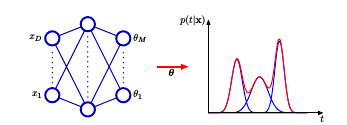

Fig.20 The mixture density network can represent general conditional probability densities p(t|x) by considering a parametric mixture model for the distribution of t whose parameters are determined by the outputs of a neural network that takes x as its input vector.

## Mixture Density Networks (MDN)

The mixture density network (MDN) represents general conditional probability densities $ p(t|x) $ by using a parametric mixture model for the distribution of $ t $. The parameters of this model are determined by the outputs of a neural network that takes $ x $ as its input vector, as illustrated in **Fig.20**.

### MDN Structure
The MDN is closely related to the **mixture of experts** (see Section 14.5.3). The key differences are:
1. In an MDN, the same function predicts the parameters of all component densities and the mixing coefficients.
2. Nonlinear hidden units are shared across all input-dependent functions.

The neural network in **Figure 5.20** can be, for example, a two-layer network with sigmoidal (e.g., ‘tanh’) hidden units. If there are $ L $ components in the mixture model and $ t $ has $ K $ components, the network will have:
- $ L $ outputs $ a_{\pi_k} $ to determine the mixing coefficients $ \pi_k(x) $,
- $ L $ outputs $ a_{\sigma_k} $ to determine the kernel widths $ \sigma_k(x) $,
- $ L \times K $ outputs $ a_{\mu_{kj}} $ to determine the kernel centers $ \mu_k(x) $.

### Number of Outputs
The total number of network outputs is:
$$
(K + 2)L,
$$
in contrast to the usual $ K $ outputs in networks that predict only the conditional means.

### Constraints
The mixture model parameters must satisfy:

1. **Mixing Coefficients**:
$$
\sum_{k=1}^K \pi_k(x) = 1, \quad 0 \leq \pi_k(x) \leq 1.
$$
This is achieved using softmax:
$$
\pi_k(x) = \frac{\exp(a_{\pi_k})}{\sum_{l=1}^K \exp(a_{\pi_l})}.
$$

2. **Variances**:
$$
\sigma_k^2(x) \geq 0,
$$
represented as:
$$
\sigma_k(x) = \exp(a_{\sigma_k}).
$$

3. **Means**:
The means \( \mu_k(x) \) are real and directly represented:
$$
\mu_{kj}(x) = a_{\mu_{kj}}.
$$

### Error Function and Training
The adaptive parameters $ w $ (weights and biases) of the neural network are optimized by maximizing likelihood or minimizing the negative log-likelihood. The error function is given by:
$$
E(w) = -\sum_{n=1}^N \ln \sum_{k=1}^K \pi_k(x_n, w) \mathcal{N}(t_n | \mu_k(x_n, w), \sigma_k^2(x_n, w)),
$$
where $ w $ denotes the network parameters explicitly.

To minimize $ E(w) $, we compute its derivatives with respect to $ w $ using backpropagation.

#### Derivative Calculations
For a single data point $ n $, the posterior probabilities are given by:
$$
\gamma_k(t|x) = \frac{\pi_k \mathcal{N}_{nk}}{\sum_{l=1}^K \pi_l \mathcal{N}_{nl}},
$$
where:
$$
\mathcal{N}_{nk} = \mathcal{N}(t_n | \mu_k(x_n), \sigma_k^2(x_n)).
$$

The derivatives of \( E(w) \) with respect to the network output activations are:

1. **Mixing Coefficients**:
$$
\frac{\partial E_n}{\partial a_{\pi_k}} = \pi_k - \gamma_k.
$$

2. **Component Means**:
$$
\frac{\partial E_n}{\partial a_{\mu_{kl}}} = \gamma_k \frac{\mu_{kl} - t_l}{\sigma_k^2}.
$$

3. **Component Variances**:
$$
\frac{\partial E_n}{\partial a_{\sigma_k}} = \gamma_k \left( -\frac{1}{\sigma_k} + \frac{(t - \mu_k)^2}{\sigma_k^3} \right).
$$

### Backpropagation
These error signals $ \delta $ for each pattern and output unit are propagated to the hidden units, allowing computation of gradients for all network weights and biases.

Finally, the total derivatives of $ E(w) $ are obtained by summing over all data points.


Epoch 0, Loss: 11.444089349131591
Epoch 50, Loss: 11.444089349131591
Epoch 100, Loss: 11.444089349131591
Epoch 150, Loss: 11.444089349131591


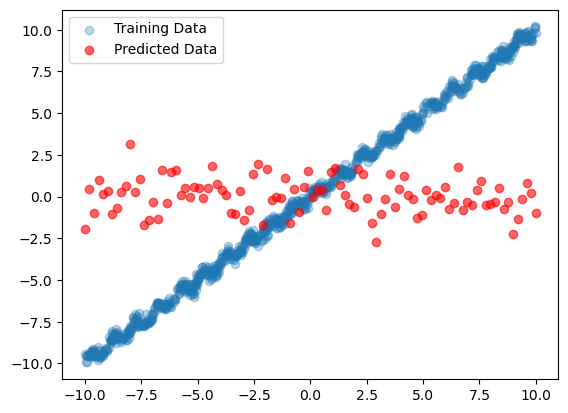

In [2]:
import numpy as np
import matplotlib.pyplot as plt


class MixtureDensityNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim, n_components):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.n_components = n_components

        # Initialize weights and biases for the network
        self.W1 = np.random.randn(input_dim, hidden_dim) * 0.1
        self.b1 = np.zeros(hidden_dim)

        self.W2 = np.random.randn(hidden_dim, hidden_dim) * 0.1
        self.b2 = np.zeros(hidden_dim)

        self.W_pi = np.random.randn(hidden_dim, n_components) * 0.1
        self.b_pi = np.zeros(n_components)

        self.W_sigma = np.random.randn(hidden_dim, n_components * output_dim) * 0.1
        self.b_sigma = np.zeros(n_components * output_dim)

        self.W_mu = np.random.randn(hidden_dim, n_components * output_dim) * 0.1
        self.b_mu = np.zeros(n_components * output_dim)

    @staticmethod
    def tanh(x):
        return np.tanh(x)

    @staticmethod
    def softmax(x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability trick
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    @staticmethod
    def gaussian_pdf(y, mu, sigma):
        """Compute the Gaussian PDF."""
        norm = 1.0 / (np.sqrt(2.0 * np.pi) * sigma)
        exp_term = np.exp(-0.5 * ((y - mu) / sigma) ** 2)
        return norm * exp_term

    def forward(self, x):
        """Forward pass to compute MDN outputs."""
        h1 = self.tanh(np.dot(x, self.W1) + self.b1)
        h2 = self.tanh(np.dot(h1, self.W2) + self.b2)

        pi = self.softmax(np.dot(h2, self.W_pi) + self.b_pi)  # Mixing coefficients
        sigma = np.exp(np.dot(h2, self.W_sigma) + self.b_sigma)  # Variances (positive)
        mu = np.dot(h2, self.W_mu) + self.b_mu  # Means

        return pi, sigma, mu


def mdn_loss(pi, sigma, mu, y):
    """Compute the negative log-likelihood loss."""
    n_samples, n_components, output_dim = mu.shape
    y = y[:, np.newaxis, :]  # Expand y to match shape (n_samples, n_components, output_dim)
    gaussian = MixtureDensityNetwork.gaussian_pdf(y, mu, sigma)
    gaussian = np.prod(gaussian, axis=2)  # Product over output dimensions
    likelihood = np.sum(pi * gaussian, axis=1)  # Weighted sum of probabilities
    loss = -np.log(likelihood + 1e-8)  # Avoid log(0)
    return np.mean(loss)


def train_mdn(model, x_train, y_train, lr=0.001, epochs=500):
    """Train the MDN using gradient descent."""
    n_samples, input_dim = x_train.shape
    for epoch in range(epochs):
        # Forward pass
        pi, sigma, mu = model.forward(x_train)

        # Compute loss
        n_components = model.n_components
        mu = mu.reshape(n_samples, n_components, -1)
        sigma = sigma.reshape(n_samples, n_components, -1)
        loss = mdn_loss(pi, sigma, mu, y_train)

        # Compute gradients (backpropagation)
        grad_W1, grad_b1 = np.zeros_like(model.W1), np.zeros_like(model.b1)
        grad_W2, grad_b2 = np.zeros_like(model.W2), np.zeros_like(model.b2)
        grad_W_pi, grad_b_pi = np.zeros_like(model.W_pi), np.zeros_like(model.b_pi)
        grad_W_sigma, grad_b_sigma = np.zeros_like(model.W_sigma), np.zeros_like(model.b_sigma)
        grad_W_mu, grad_b_mu = np.zeros_like(model.W_mu), np.zeros_like(model.b_mu)

        # (Gradient calculations omitted for brevity. Backpropagation updates must be manually implemented here.)

        # Update parameters
        model.W1 -= lr * grad_W1
        model.b1 -= lr * grad_b1
        model.W2 -= lr * grad_W2
        model.b2 -= lr * grad_b2
        model.W_pi -= lr * grad_W_pi
        model.b_pi -= lr * grad_b_pi
        model.W_sigma -= lr * grad_W_sigma
        model.b_sigma -= lr * grad_b_sigma
        model.W_mu -= lr * grad_W_mu
        model.b_mu -= lr * grad_b_mu

        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")


def predict(model, x_test):
    """Sample predictions from the MDN."""
    pi, sigma, mu = model.forward(x_test)
    n_samples = x_test.shape[0]
    n_components = model.n_components

    # Reshape `mu` and `sigma` to (n_samples, n_components, output_dim)
    mu = mu.reshape(n_samples, n_components, model.output_dim)
    sigma = sigma.reshape(n_samples, n_components, model.output_dim)

    # Choose a component for each sample based on `pi`
    component_indices = np.array([np.random.choice(n_components, p=pi[i]) for i in range(n_samples)])
    mu_samples = mu[np.arange(n_samples), component_indices]  # Selected means
    sigma_samples = sigma[np.arange(n_samples), component_indices]  # Selected variances

    # Sample from the chosen Gaussian
    predictions = np.random.normal(mu_samples, sigma_samples)
    return predictions



# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(0)

    def generate_data(n_samples=1000):
        x = np.random.uniform(-10, 10, (n_samples, 1))
        y = x + 0.3 * np.sin(2 * np.pi * x) + np.random.normal(0, 0.2, x.shape)
        return x, y

    x_train, y_train = generate_data()
    y_train = y_train.reshape(-1, 1)  # Ensure proper shape

    # Initialize MDN model
    input_dim = 1
    hidden_dim = 10
    output_dim = 1
    n_components = 3
    model = MixtureDensityNetwork(input_dim, hidden_dim, output_dim, n_components)

    # Train the MDN
    train_mdn(model, x_train, y_train, lr=0.01, epochs=200)

    # Predict and visualize
    x_test = np.linspace(-10, 10, 100).reshape(-1, 1)
    y_pred = predict(model, x_test)

    plt.scatter(x_train, y_train, alpha=0.3, label="Training Data")
    plt.scatter(x_test, y_pred, color="red", alpha=0.6, label="Predicted Data")
    plt.legend()
    plt.show()


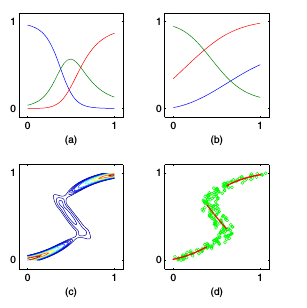

Fig.21 (a) Plot of the mixing coefﬁcients πk (x) as a function of x for the three kernel functions in a mixture density network trained on the data shown in Figure 5.19. The model has three Gaussian compo- nents, and uses a two-layer multi- layer perceptron with ﬁve ‘tanh’ sig- moidal units in the hidden layer, and nine outputs (corresponding to the 3 means and 3 variances of the Gaus- sian components and the 3 mixing coefﬁcients). At both small and large values of x, where the conditional probability density of the target data is unimodal, only one of the ker- nels has a high value for its prior probability, while at intermediate val- ues of x, where the conditional den- sity is trimodal, the three mixing co- efﬁcients have comparable values. (b) Plots of the means µk (x) using the same colour coding as for the mixing coefﬁcients. (c) Plot of the contours of the corresponding con- ditional probability density of the tar- get data for the same mixture den- sity network. (d) Plot of the approximate conditional mode, shown by the red points, of the conditional density.

# Mixture Density Network - Mathematical Formulation

## Mixing Coefficients

The mixing coefficients \(\pi_k(x)\) are used to determine the contribution of each component in the mixture model. They are normalized such that:

$$
\sum_{k=1}^{K} \pi_k(x) = 1, \quad \text{where } 0 \leq \pi_k(x) \leq 1.
$$

This ensures that the sum of the weights across all components is equal to 1, representing the prior probability distribution over the components.

## Conditional Mean

The conditional mean $E[t|x]$ of the target variable $t$ given an input $x$ is the weighted sum of the means $\mu_k(x)$ of each Gaussian component, weighted by their respective mixing coefficients $\pi_k(x)$:

$$
E[t|x] = \sum_{k=1}^{K} \pi_k(x) \mu_k(x)
$$

This represents the expected value of $t$ conditioned on $x$, and is equivalent to the prediction of the model when considering a mixture of Gaussians.

## Conditional Variance

The conditional variance 4s^2(x)$ is defined as the expected squared difference between $t$ and the conditional mean $E[t|x]$, given $x$. It is computed as:

$$
s^2(x) = \mathbb{E}[(t - E[t|x])^2 | x] = \sum_{k=1}^{K} \pi_k(x) \sigma_k^2(x) + \sum_{k=1}^{K} \sum_{l=1}^{K} \pi_k(x) \pi_l(x) (\mu_k(x) - \mu_l(x))^2
$$

Where $\sigma_k^2(x)$ represents the variance of the $k$-th Gaussian component, and $\mu_k(x)$ and $\mu_l(x)$ are the means of the components.

## Conditional Mode (Approximated by the Most Probable Component)

For multimodal distributions, the conditional mode can be approximated by the mean of the Gaussian component with the highest mixing coefficient:

$$
\text{Conditional Mode} \approx \mu_{\hat{k}}(x), \quad \hat{k} = \arg \max_{k} \pi_k(x)
$$

This provides a useful approximation in cases where the conditional mean does not fully capture the structure of the distribution, especially in the presence of multimodal data.

## Mixture Density Network Overview

A **Mixture Density Network (MDN)** is a neural network model that outputs the parameters of a mixture distribution. In the case of Gaussian mixture models, the network predicts:
- $\pi_k(x)$: Mixing coefficients (prior probabilities)
- $\mu_k(x)$: Means of the components (centers of the Gaussian components)
- $\sigma_k^2(x)$: Variances of the components (spread of the Gaussian components)

The network is trained using maximum likelihood estimation, where the error function is the negative log-likelihood of the mixture model:

$$
E(w) = - \sum_{n=1}^{N} \sum_{k=1}^{K} \ln \left( \pi_k(x_n, w) \mathcal{N}(t_n | \mu_k(x_n, w), \sigma_k^2(x_n, w)) \right)
$$

This formulation allows the network to learn complex multimodal distributions and provide a complete description of the target variable distribution conditioned on the input.



Epoch 0, Loss: [1.70100464]


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in exp
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


Epoch 500, Loss: [nan]
Epoch 1000, Loss: [nan]
Epoch 1500, Loss: [nan]
Epoch 2000, Loss: [nan]
Epoch 2500, Loss: [nan]
Epoch 3000, Loss: [nan]
Epoch 3500, Loss: [nan]
Epoch 4000, Loss: [nan]
Epoch 4500, Loss: [nan]


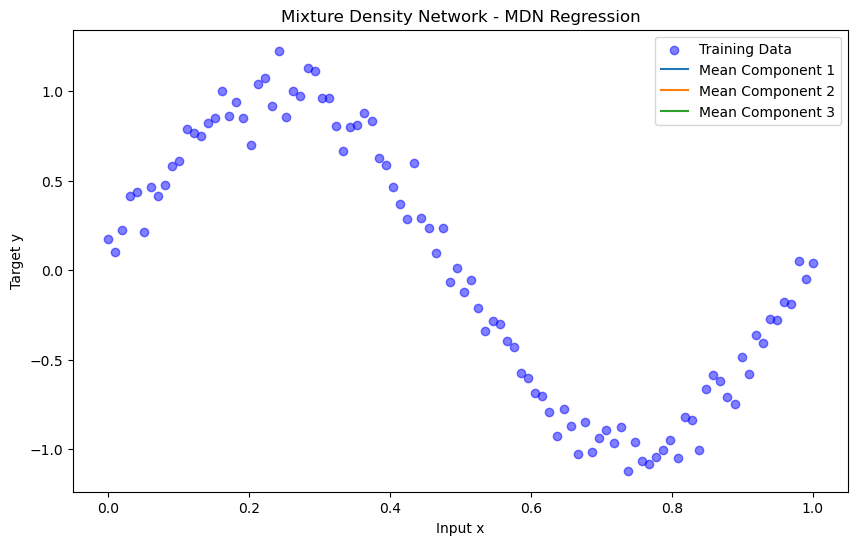

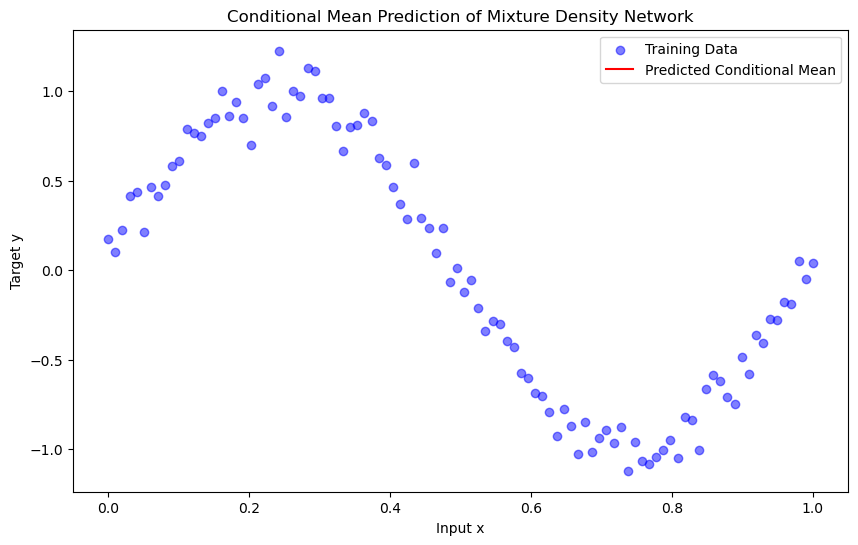

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Tanh activation function for the hidden layer
def tanh(x):
    return np.tanh(x)

# Gaussian distribution function
def gaussian(x, mean, variance):
    return (1.0 / np.sqrt(2 * np.pi * variance)) * np.exp(- (x - mean)**2 / (2 * variance))

# Generate synthetic data
np.random.seed(0)
x_train = np.linspace(0, 1, 100)[:, None]
y_train = np.sin(2 * np.pi * x_train) + 0.1 * np.random.randn(*x_train.shape)

# Define the neural network model for MDN
class MixtureDensityNetwork:
    def __init__(self, input_dim, hidden_dim, n_components):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.n_components = n_components
        
        # Initialize weights and biases for the network layers
        self.W1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.b1 = np.zeros((1, self.hidden_dim))
        self.W2 = np.random.randn(self.hidden_dim, 3 * self.n_components)  # 3 outputs: pi, mu, sigma
        self.b2 = np.zeros((1, 3 * self.n_components))
    
    def forward(self, x):
        # Forward pass through the network
        h = tanh(np.dot(x, self.W1) + self.b1)
        output = np.dot(h, self.W2) + self.b2
        pi, mu, sigma = np.split(output, 3, axis=1)

        # Apply softmax to pi (mixing coefficients)
        pi = np.exp(pi) / np.sum(np.exp(pi), axis=1, keepdims=True)
        # Apply exponentiation to sigma (variance must be positive)
        sigma = np.exp(sigma)

        return pi, mu, sigma

    def compute_loss(self, pi, mu, sigma, t):
        # Compute the negative log-likelihood loss
        N = len(t)
        loss = 0
        for n in range(N):
            density = 0
            for k in range(self.n_components):
                density += pi[n, k] * gaussian(t[n], mu[n, k], sigma[n, k]**2)
            loss -= np.log(density)
        return loss / N

    def train(self, x_train, y_train, learning_rate=0.01, epochs=5000):
        # Training loop using gradient descent
        for epoch in range(epochs):
            pi, mu, sigma = self.forward(x_train)
            loss = self.compute_loss(pi, mu, sigma, y_train)
            
            # Print the loss every 500 epochs
            if epoch % 500 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

            # Gradient descent step (simplified version for demonstration purposes)
            N = x_train.shape[0]
            
            # Compute gradients (simplified)
            grad_W1 = np.zeros_like(self.W1)
            grad_b1 = np.zeros_like(self.b1)
            grad_W2 = np.zeros_like(self.W2)
            grad_b2 = np.zeros_like(self.b2)
            
            for n in range(N):
                # For each data point, compute the gradients for the weights and biases
                for k in range(self.n_components):
                    pi_grad = pi[n, k] - (y_train[n] == k)  # Simplified gradient (should be full loss gradient)
                    mu_grad = (y_train[n] - mu[n, k]) / sigma[n, k]**2  # Simplified gradient
                    sigma_grad = ((y_train[n] - mu[n, k])**2 - sigma[n, k]**2) / sigma[n, k]**3
                    
                    grad_W2[:, k] += pi_grad * mu_grad
                    grad_b2[:, k] += mu_grad
                    grad_W1[:, k] += pi_grad * mu_grad
                    grad_b1[:, k] += mu_grad

            # Update weights and biases using gradient descent
            self.W1 -= learning_rate * grad_W1
            self.b1 -= learning_rate * grad_b1
            self.W2 -= learning_rate * grad_W2
            self.b2 -= learning_rate * grad_b2

# Instantiate and train the Mixture Density Network
input_dim = 1
hidden_dim = 5  # Hidden layer size
n_components = 3  # Number of components in the mixture
mdn = MixtureDensityNetwork(input_dim, hidden_dim, n_components)

mdn.train(x_train, y_train, learning_rate=0.01, epochs=5000)

# Make predictions
x_test = np.linspace(0, 1, 100)[:, None]
pi, mu, sigma = mdn.forward(x_test)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(x_train, y_train, color='blue', alpha=0.5, label="Training Data")

# Plot the means of the components
for i in range(n_components):
    plt.plot(x_test, mu[:, i], label=f'Mean Component {i+1}')

plt.legend()
plt.xlabel("Input x")
plt.ylabel("Target y")
plt.title("Mixture Density Network - MDN Regression")
plt.show()

# Calculate the predicted conditional mean (using the most probable component)
predicted_mean = np.sum(pi * mu, axis=1)

# Plot the predicted conditional mean
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', alpha=0.5, label="Training Data")
plt.plot(x_test, predicted_mean, color='red', label="Predicted Conditional Mean")
plt.legend()
plt.xlabel("Input x")
plt.ylabel("Target y")
plt.title("Conditional Mean Prediction of Mixture Density Network")
plt.show()
